> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>I've choosen the Football Teams data from kaggle to view a statistics of the most known teams and leagues in  europe beacuse I am in love with this sport and love to use my knowlage in the course to view them

In [219]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import os

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties


In [220]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('Football_teams.csv')
df.head()

,Team,Tournament,Goals,Shots pg,yellow_cards,red_cards,Possession%,Pass%,AerialsWon,Rating
0,Manchester City,Premier League,83,15.8,46,2,60.8,89.4,12.8,7.01
1,Bayern Munich,Bundesliga,99,17.1,44,3,58.1,85.5,12.9,6.95
2,Paris Saint-Germain,Ligue 1,86,15.0,73,7,60.1,89.5,9.5,6.88
3,Barcelona,LaLiga,85,15.3,68,2,62.4,89.7,10.6,6.87
4,Real Madrid,LaLiga,67,14.4,57,2,57.7,87.7,11.8,6.86


In [221]:
df.shape

(98, 10)

In [222]:
df.fillna(df.mean(), inplace=True)
df.head()




,Team,Tournament,Goals,Shots pg,yellow_cards,red_cards,Possession%,Pass%,AerialsWon,Rating
0,Manchester City,Premier League,83,15.8,46,2,60.8,89.4,12.8,7.01
1,Bayern Munich,Bundesliga,99,17.1,44,3,58.1,85.5,12.9,6.95
2,Paris Saint-Germain,Ligue 1,86,15.0,73,7,60.1,89.5,9.5,6.88
3,Barcelona,LaLiga,85,15.3,68,2,62.4,89.7,10.6,6.87
4,Real Madrid,LaLiga,67,14.4,57,2,57.7,87.7,11.8,6.86


In [223]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 10 columns):
Team            98 non-null object
Tournament      98 non-null object
Goals           98 non-null int64
Shots pg        98 non-null float64
yellow_cards    98 non-null int64
red_cards       98 non-null int64
Possession%     98 non-null float64
Pass%           98 non-null float64
AerialsWon      98 non-null float64
Rating          98 non-null float64
dtypes: float64(5), int64(3), object(2)
memory usage: 7.7+ KB


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [224]:
sum(df.duplicated())


0

In [225]:
df.drop_duplicates(inplace=True)

In [226]:
df.fillna(df.mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 97
Data columns (total 10 columns):
Team            98 non-null object
Tournament      98 non-null object
Goals           98 non-null int64
Shots pg        98 non-null float64
yellow_cards    98 non-null int64
red_cards       98 non-null int64
Possession%     98 non-null float64
Pass%           98 non-null float64
AerialsWon      98 non-null float64
Rating          98 non-null float64
dtypes: float64(5), int64(3), object(2)
memory usage: 8.4+ KB


In [227]:

sum(df.duplicated())

0

In [228]:
df.head()

,Team,Tournament,Goals,Shots pg,yellow_cards,red_cards,Possession%,Pass%,AerialsWon,Rating
0,Manchester City,Premier League,83,15.8,46,2,60.8,89.4,12.8,7.01
1,Bayern Munich,Bundesliga,99,17.1,44,3,58.1,85.5,12.9,6.95
2,Paris Saint-Germain,Ligue 1,86,15.0,73,7,60.1,89.5,9.5,6.88
3,Barcelona,LaLiga,85,15.3,68,2,62.4,89.7,10.6,6.87
4,Real Madrid,LaLiga,67,14.4,57,2,57.7,87.7,11.8,6.86


In [229]:
df.describe()

,Goals,Shots pg,yellow_cards,red_cards,Possession%,Pass%,AerialsWon,Rating
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,52.183673,11.851020,69.704082,3.336735,49.995918,80.441837,16.006122,6.646122
std,16.445691,2.149718,15.137316,2.148814,4.890068,4.690172,3.078955,0.132148
min,20.000000,7.100000,40.000000,0.000000,38.500000,66.500000,9.500000,6.410000
25%,40.250000,10.325000,60.000000,2.000000,46.225000,78.025000,14.025000,6.540000
50%,50.000000,11.450000,67.500000,3.000000,49.750000,80.800000,16.100000,6.630000
75%,61.750000,13.350000,80.000000,4.750000,52.850000,83.450000,17.850000,6.730000
max,99.000000,17.100000,117.000000,10.000000,62.400000,89.700000,26.800000,7.010000


In [230]:
df.shape

(98, 10)

In [231]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### statistical analysis 


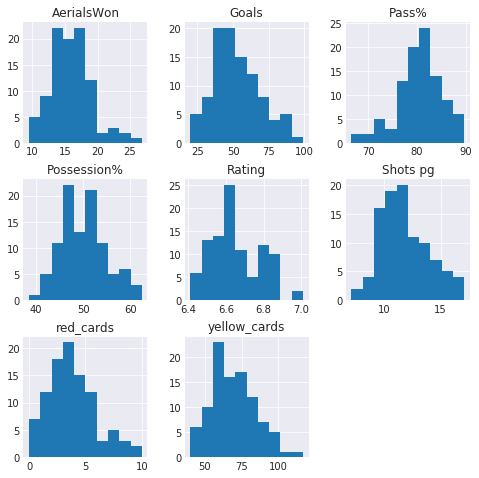

In [232]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.hist(figsize=(8, 8));

### Leagues/teams statistics


Text(0.5,1,'Goals in Tournament')

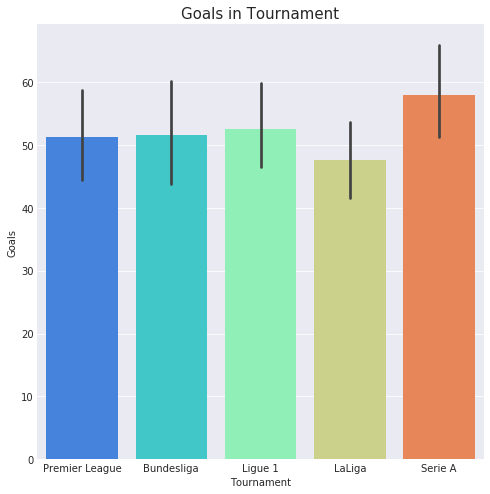

In [233]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
plt.figure(figsize=(8,8))
sns.barplot(x=df.Tournament, y=df.Goals, palette='rainbow')
plt.title('Goals in Tournament', fontsize=15)

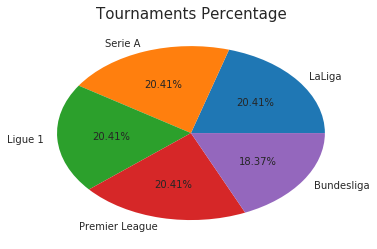

In [234]:
df1 = df['Tournament'].value_counts()
plt.pie(df1.values, labels=df1.index, autopct='%0.2f%%')
plt.title('Tournaments Percentage', fontsize=15)
plt.show()

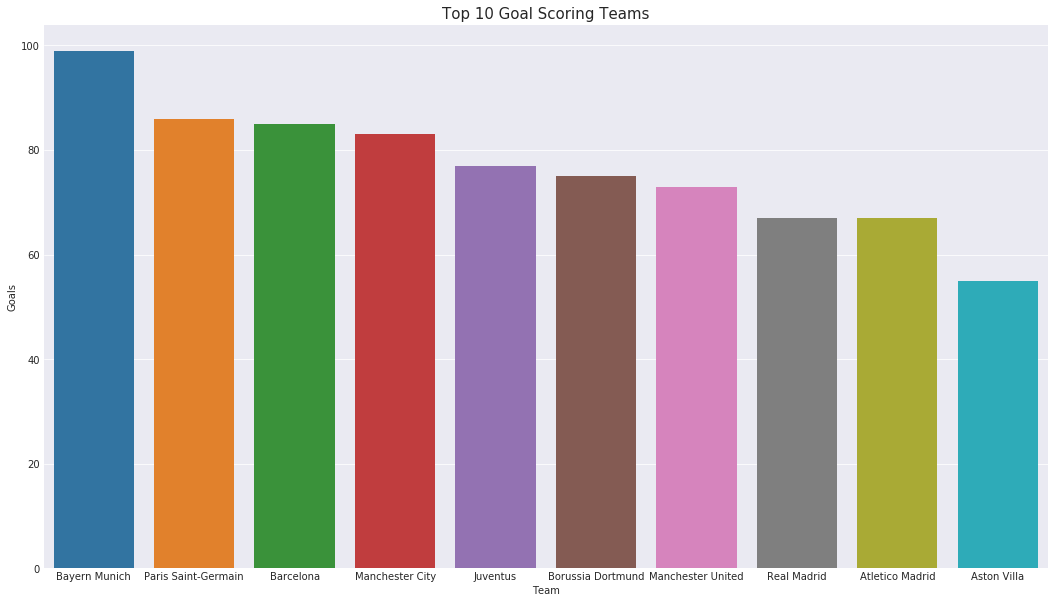

In [235]:
sns.set_style('darkgrid')
plt.figure(figsize=(18,10))
sns.barplot(x='Team',y='Goals', data=df[:10].sort_values(by='Goals',ascending=False))
plt.title('Top 10 Goal Scoring Teams', fontsize=15);

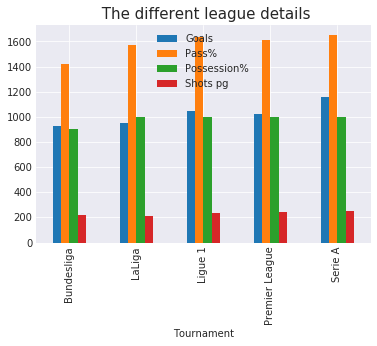

In [236]:
plt.figure(figsize=(16,10))
tournaments = df.groupby('Tournament')['Goals','Pass%','Possession%','Shots pg'].sum().plot(kind='bar')
plt.title(" The different league details", fontsize=15)
plt.legend()
plt.show();

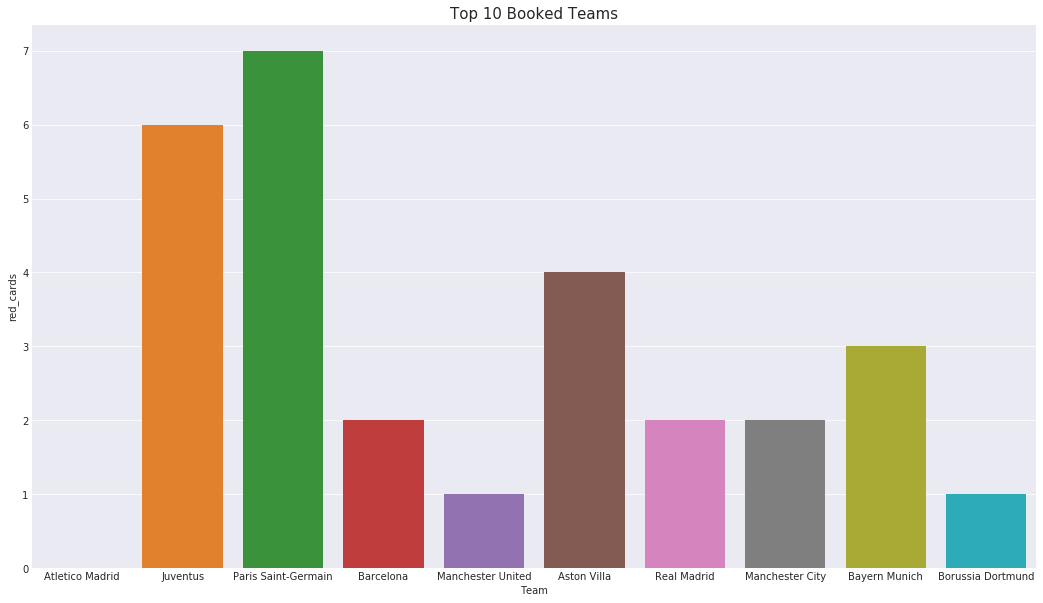

In [237]:
sns.set_style('darkgrid')
plt.figure(figsize=(18,10))
sns.barplot(x='Team',y='red_cards', data=df[:10].sort_values(by='yellow_cards',ascending=False))
plt.title('Top 10 Booked Teams', fontsize=15);

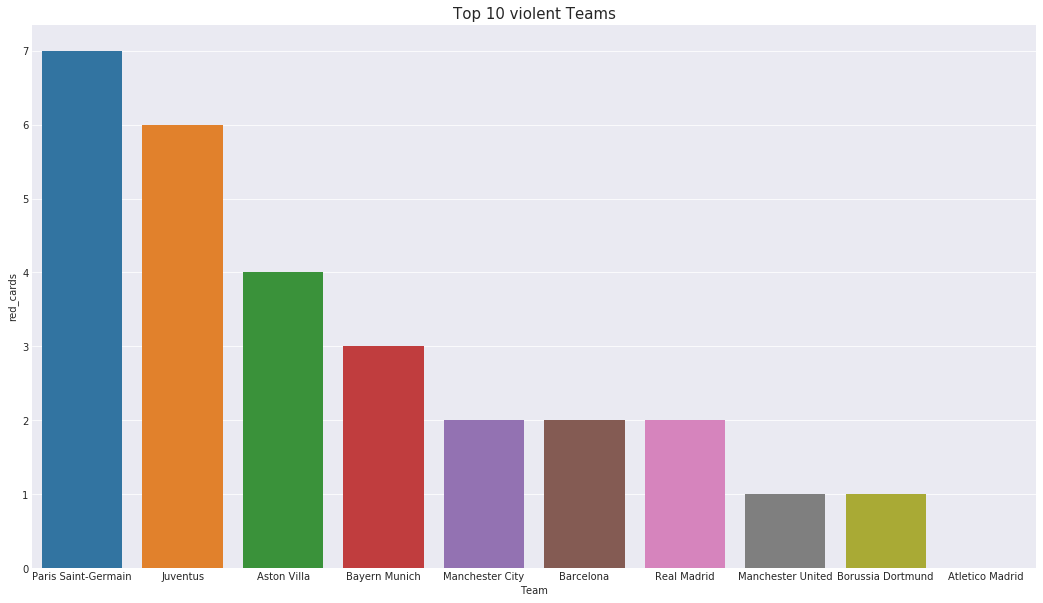

In [238]:
sns.set_style('darkgrid')
plt.figure(figsize=(18,10))
sns.barplot(x='Team',y='red_cards', data=df[:10].sort_values(by='red_cards',ascending=False))
plt.title('Top 10 violent Teams', fontsize=15);

<a id='conclusions'></a>
## Conclusions


>**It was foun that:**.

>1-Seria A is the riched league with goals.


>2-Bayren Munichen is the most scoring team.

>3-Paris Saint-German is the most booked team.

>4-Paris Saint-German is the most violent team.
>
## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])